In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

from hyppo.ksample import KSample
from lib.ranks.dst import Permuter
from lib.ranks.dst import Limiter
from lib.ranks.rank import rank

In [24]:
DIMENSION = 2
SEED = 3724
DISTRIBUTION = 1000

PVALUE = 20

# Normal distribution

## Equal covariance matrices different means

In [25]:
def normal_mean(sizes, means, dim=2):
    result = []
    for size, mean in zip(sizes, means):
        sample = np.random.multivariate_normal(
            mean + np.zeros(dim),
            np.identity(dim),
            size=size)
        result.append(sample)
    
    return result

### Heller test

In [26]:
%%time
criteria = KSample(indep_test="HHG")
permuter = Permuter(
    KSample(indep_test="HHG").statistic,
    DIMENSION,
    40, 20,
    seed=SEED
)
permuter.distribution(DISTRIBUTION, 
    seeds=[2342, 1234, 8578, 4326])
;

CPU times: user 10.4 ms, sys: 59.8 ms, total: 70.2 ms
Wall time: 2.44 s


''

#### Different means

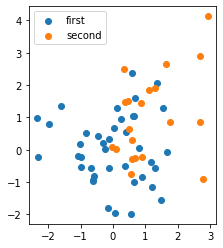

In [27]:
first, second = normal_mean(
    [40, 20],
    [0, 1],
    dim=DIMENSION
)

plt.scatter(first[:, 0], first[:, 1], label="first")
plt.scatter(second[:, 0], second[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

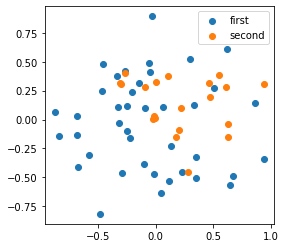

In [28]:
rfirst, rsecond = rank([first, second], permuter.ranks)

plt.scatter(rfirst[:, 0], rfirst[:, 1], label="first")
plt.scatter(rsecond[:, 0], rsecond[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

In [29]:
%%time
pvr = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [40, 20],
        [0, 1],
        dim=DIMENSION
    )
    pvr.append(permuter.test(first, second)[1])

pvr = sorted(pvr)

100%|██████████| 20/20 [00:00<00:00, 160.46it/s]

CPU times: user 125 ms, sys: 4.29 ms, total: 129 ms
Wall time: 127 ms


In [30]:
%%time
pvo = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [40, 20],
        [0, 1],
        dim=DIMENSION
    )
    pvo.append(criteria.test(first, second)[1])
    
pvo = sorted(pvo)

100%|██████████| 20/20 [01:12<00:00,  3.63s/it]

CPU times: user 1min 12s, sys: 395 ms, total: 1min 12s
Wall time: 1min 12s


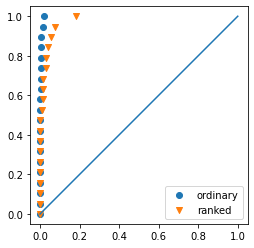

In [31]:
x = np.linspace(0, 1, PVALUE)
plt.scatter(pvo, x, label="ordinary", marker="o")
plt.scatter(pvr, x, label="ranked", marker="v")
plt.plot(x, x)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

#### Equal means

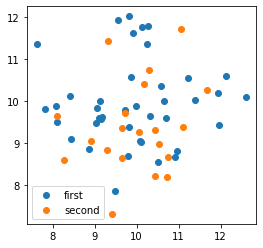

In [32]:
first, second = normal_mean(
    [40, 20],
    [10, 10],
    dim=DIMENSION
)

plt.scatter(first[:, 0], first[:, 1], label="first")
plt.scatter(second[:, 0], second[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

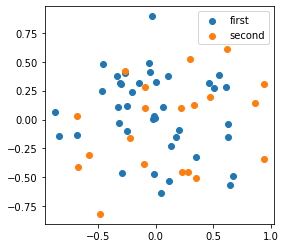

In [33]:
rfirst, rsecond = rank([first, second], permuter.ranks)

plt.scatter(rfirst[:, 0], rfirst[:, 1], label="first")
plt.scatter(rsecond[:, 0], rsecond[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

In [36]:
%%time
pvr = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [40, 20],
        [10, 10],
        dim=DIMENSION
    )
    pvr.append(permuter.test(first, second)[1])

pvr = sorted(pvr)

100%|██████████| 20/20 [00:00<00:00, 154.39it/s]

CPU times: user 130 ms, sys: 3.48 ms, total: 134 ms
Wall time: 132 ms


In [37]:
%%time
pvo = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_mean(
        [40, 20],
        [10, 10],
        dim=DIMENSION
    )
    pvo.append(criteria.test(first, second)[1])
    
pvo = sorted(pvo)

100%|██████████| 20/20 [01:13<00:00,  3.66s/it]

CPU times: user 1min 12s, sys: 391 ms, total: 1min 13s
Wall time: 1min 13s


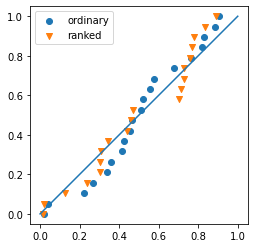

In [38]:
x = np.linspace(0, 1, PVALUE)
plt.scatter(pvo, x, label="ordinary", marker="o")
plt.scatter(pvr, x, label="ranked", marker="v")
plt.plot(x, x)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

## Equal  means different covariance matrices

In [39]:
def normal_cov(sizes, covs, dim=2):
    result = []
    for size, cov in zip(sizes, covs):
        sample = np.random.multivariate_normal(
            np.zeros(dim),
            np.array(cov),
            size=size)
        result.append(sample)
    
    return result

### Heller test

In [41]:
%%time
criteria = KSample(indep_test="HHG")
permuter = Permuter(
    KSample(indep_test="HHG").statistic,
    DIMENSION,
    100, 50,
    seed=SEED
)
permuter.distribution(DISTRIBUTION, 
    seeds=[2342, 1234, 8578, 4326])
;

CPU times: user 5.66 ms, sys: 40.2 ms, total: 45.8 ms
Wall time: 9.88 s


''

#### Different covs

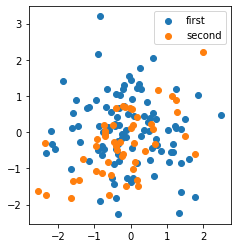

In [42]:
first, second = normal_cov(
    [100, 50],
    [
        [[1, 0],
         [0, 1]],
        [[1, 0.5],
         [0.5, 1]]
    ],
    dim=DIMENSION
)

plt.scatter(first[:, 0], first[:, 1], label="first")
plt.scatter(second[:, 0], second[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

In [43]:
%%time
pvr = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_cov(
        [100, 50],
        [
            [[1, 0],
             [0, 1]],
            [[1, 0.5],
             [0.5, 1]]
        ],
        dim=DIMENSION
    )
    pvr.append(permuter.test(first, second)[1])

pvr = sorted(pvr)

100%|██████████| 20/20 [00:00<00:00, 30.58it/s]

CPU times: user 3.82 s, sys: 1.02 s, total: 4.84 s
Wall time: 655 ms


In [44]:
%%time
pvo = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_cov(
        [100, 50],
        [
            [[1, 0],
             [0, 1]],
            [[1, 0.5],
             [0.5, 1]]
        ],
        dim=DIMENSION
    )
    pvo.append(criteria.test(first, second)[1])
    
pvo = sorted(pvo)

100%|██████████| 20/20 [09:37<00:00, 28.88s/it]

CPU times: user 9min 55s, sys: 7.76 s, total: 10min 2s
Wall time: 9min 37s


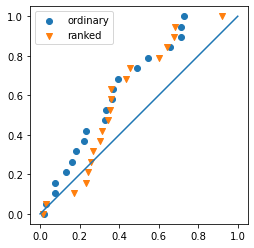

In [45]:
x = np.linspace(0, 1, PVALUE)
plt.scatter(pvo, x, label="ordinary", marker="o")
plt.scatter(pvr, x, label="ranked", marker="v")
plt.plot(x, x)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

#### Equal covs

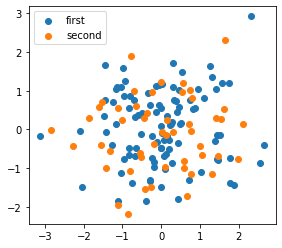

In [46]:
first, second = normal_cov(
    [100, 50],
    [
        [[1, 0],
         [0, 1]],
        [[1, 0],
         [0, 1]]
    ],
    dim=DIMENSION
)

plt.scatter(first[:, 0], first[:, 1], label="first")
plt.scatter(second[:, 0], second[:, 1], label="second")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

In [47]:
%%time
pvr = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_cov(
        [100, 50],
        [
            [[1, 0],
             [0, 1]],
            [[1, 0],
             [0, 1]]
        ],
        dim=DIMENSION
    )
    pvr.append(permuter.test(first, second)[1])

pvr = sorted(pvr)

100%|██████████| 20/20 [00:00<00:00, 31.01it/s]

CPU times: user 4.02 s, sys: 964 ms, total: 4.99 s
Wall time: 646 ms


In [48]:
%%time
pvo = []
for i in tqdm.tqdm(range(PVALUE)):
    first, second = normal_cov(
        [FIRST_SIZE, SECOND_SIZE],
        [
            [[1, 0],
             [0, 1]],
            [[1, 0],
             [0, 1]]
        ],
        dim=DIMENSION
    )
    pvo.append(criteria.test(first, second)[1])
    
pvo = sorted(pvo)

100%|██████████| 20/20 [01:10<00:00,  3.51s/it]

CPU times: user 1min 10s, sys: 510 ms, total: 1min 11s
Wall time: 1min 10s


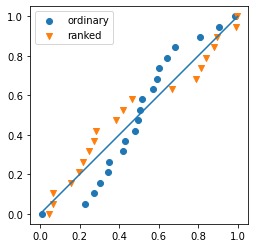

In [49]:
x = np.linspace(0, 1, PVALUE)
plt.scatter(pvo, x, label="ordinary", marker="o")
plt.scatter(pvr, x, label="ranked", marker="v")
plt.plot(x, x)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()